In [2]:
#Kyle Branch 

In [3]:
#Dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Store filepath as variable 
file = Path("Resources/Crimes_-_2010_to_2023.csv")

In [5]:
#Read data file with pandas
original_df = pd.read_csv(file)
original_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Logitude,Location
0,7823660,HS634379,11/19/10 9:00,076XX S ABERDEEN ST,320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,...,17.0,71,3,1170306.0,1854179.0,2010,9/14/23 15:41,41.755353,-87.651440,"(41.755353249, -87.651440192)"
1,12850000,JF423109,11/24/10 0:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,12.0,58,17,1155157.0,1873719.0,2010,9/19/23 15:41,41.809290,-87.706436,"(41.809289985, -87.706435685)"
2,12422166,JE300051,6/1/10 0:00,063XX S CALIFORNIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,...,16.0,66,17,NaN,NaN,2010,9/20/23 15:41,NaN,NaN,NaN
3,7420190,HS221724,3/23/10 12:36,045XX S FORRESTVILLE AVE,261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,...,3.0,38,2,1180700.0,1875059.0,2010,9/23/23 15:41,41.812418,-87.612708,"(41.812417562, -87.61270782)"
4,7686289,HS492280,8/31/10 17:00,027XX S INDIANA AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,...,4.0,35,2,1178044.0,1886556.0,2010,9/29/23 15:41,41.844027,-87.622101,"(41.844026941, -87.622100808)"


In [6]:
#Cleaing data by removing columns
cleaned_df = original_df.drop(columns=['Case Number','IUCR', 'Beat', 'District', 'Community Area', 'FBI Code', 
                                      'X Coordinate', 'Y Coordinate', 'Location'])

cleaned_df.head()


,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Year,Updated On,Latitude,Logitude
0,7823660,11/19/10 9:00,076XX S ABERDEEN ST,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,17.0,2010,9/14/23 15:41,41.755353,-87.651440
1,12850000,11/24/10 0:00,046XX S SPAULDING AVE,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,12.0,2010,9/19/23 15:41,41.809290,-87.706436
2,12422166,6/1/10 0:00,063XX S CALIFORNIA AVE,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,16.0,2010,9/20/23 15:41,NaN,NaN
3,7420190,3/23/10 12:36,045XX S FORRESTVILLE AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,3.0,2010,9/23/23 15:41,41.812418,-87.612708
4,7686289,8/31/10 17:00,027XX S INDIANA AVE,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,4.0,2010,9/29/23 15:41,41.844027,-87.622101


In [7]:
# Rename "Logitude" to "Longitude"
clean_df = cleaned_df.rename(columns={'Logitude ': 'Longitude'})
clean_df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Year,Updated On,Latitude,Longitude
0,7823660,11/19/10 9:00,076XX S ABERDEEN ST,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,17.0,2010,9/14/23 15:41,41.755353,-87.651440
1,12850000,11/24/10 0:00,046XX S SPAULDING AVE,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,12.0,2010,9/19/23 15:41,41.809290,-87.706436
2,12422166,6/1/10 0:00,063XX S CALIFORNIA AVE,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,16.0,2010,9/20/23 15:41,NaN,NaN
3,7420190,3/23/10 12:36,045XX S FORRESTVILLE AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,3.0,2010,9/23/23 15:41,41.812418,-87.612708
4,7686289,8/31/10 17:00,027XX S INDIANA AVE,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,4.0,2010,9/29/23 15:41,41.844027,-87.622101


In [8]:
# Checking data types
clean_df.dtypes


ID                        int64
Date                     object
Block                    object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Ward                    float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
dtype: object

In [9]:
# Convert Ward to object type

clean_df['Ward'] = clean_df['Ward'].astype('str')
clean_df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Year,Updated On,Latitude,Longitude
0,7823660,11/19/10 9:00,076XX S ABERDEEN ST,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,17.0,2010,9/14/23 15:41,41.755353,-87.651440
1,12850000,11/24/10 0:00,046XX S SPAULDING AVE,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,12.0,2010,9/19/23 15:41,41.809290,-87.706436
2,12422166,6/1/10 0:00,063XX S CALIFORNIA AVE,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,16.0,2010,9/20/23 15:41,NaN,NaN
3,7420190,3/23/10 12:36,045XX S FORRESTVILLE AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,3.0,2010,9/23/23 15:41,41.812418,-87.612708
4,7686289,8/31/10 17:00,027XX S INDIANA AVE,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,4.0,2010,9/29/23 15:41,41.844027,-87.622101


In [10]:
clean_df.dtypes

ID                        int64
Date                     object
Block                    object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Ward                     object
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
dtype: object

In [11]:
# What are the six most common crimes in Chicago

crime_counts = clean_df["Primary Type"].value_counts()
top_crimes = crime_counts.head(6)
top_crimes

Primary Type
THEFT                  55862
BATTERY                42224
CRIMINAL DAMAGE        26437
MOTOR VEHICLE THEFT    22352
ASSAULT                21563
DECEPTIVE PRACTICE     17606
Name: count, dtype: int64

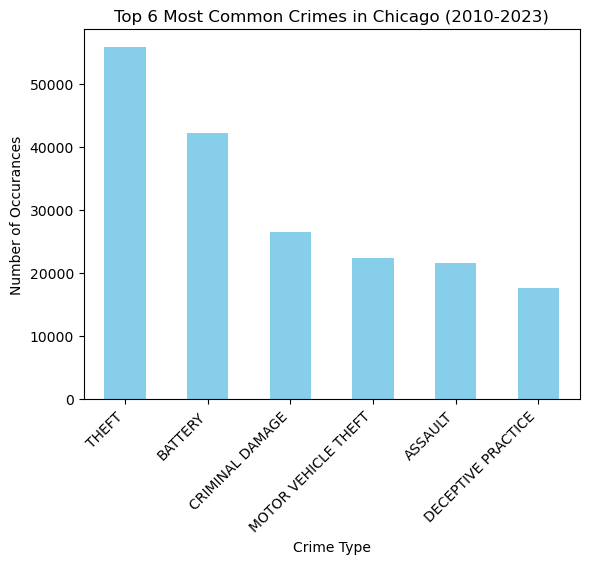

In [12]:
# Bar chart showing results

top_crimes.plot(kind='bar', color='skyblue')

# Add labels and title

plt.xlabel('Crime Type')
plt.ylabel('Number of Occurances')
plt.title("Top 6 Most Common Crimes in Chicago (2010-2023)")
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
# Identify the top 6 most common crimes
top_6_crimes = clean_df['Primary Type'].value_counts().head(6).index

# Filter the DataFrame for only the top 6 crimes
filtered_df = clean_df[clean_df['Primary Type'].isin(top_6_crimes)]

# Group by 'Ward' and count occurrences of these crimes
ward_crime_counts = filtered_df['Ward'].value_counts()

# Sort the wards by the number of these crimes
ward_crime_counts_sorted = ward_crime_counts.sort_values(ascending=False)

# Display the top 5 most affected wards
most_affected_wards = ward_crime_counts_sorted.head(5)
print("Most Affected Wards by Top 6 Crimes:")
print(most_affected_wards)

# Display the top 5 least affected wards
least_affected_wards = ward_crime_counts_sorted.tail(5)
print("\nLeast Affected Wards by Top 6 Crimes:")
print(least_affected_wards)

Most Affected Wards by Top 6 Crimes:
Ward
27.0    8110
28.0    7540
6.0     6638
42.0    6494
4.0     5832
Name: count, dtype: int64

Least Affected Wards by Top 6 Crimes:
Ward
13.0    1981
19.0    1914
23.0    1875
38.0    1645
nan        2
Name: count, dtype: int64


Correlation between Crime Count and Ward: -0.3203958018073767


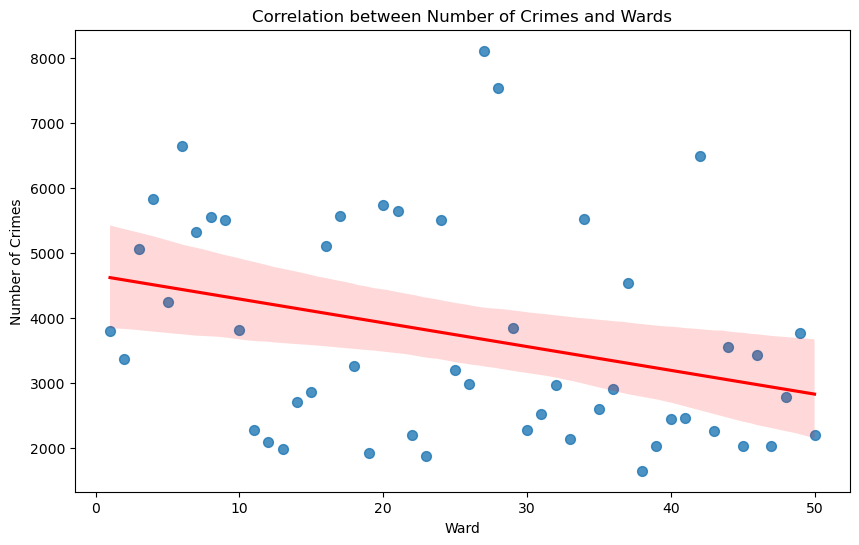

In [14]:
top_6_crimes = clean_df['Primary Type'].value_counts().head(6).index
filtered_df = clean_df[clean_df['Primary Type'].isin(top_6_crimes)]

# Count occurrences of crimes per ward
ward_crime_counts = filtered_df['Ward'].value_counts().reset_index()
ward_crime_counts.columns = ['Ward', 'Crime_Count']

# Calculate correlation

ward_crime_counts['Ward'] = pd.to_numeric(ward_crime_counts['Ward'], errors='coerce')

# Drop rows where conversion to numeric failed (if any)
ward_crime_counts = ward_crime_counts.dropna()

# Calculate correlation
correlation = ward_crime_counts['Crime_Count'].corr(ward_crime_counts['Ward'])

print("Correlation between Crime Count and Ward:", correlation)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='Ward', y='Crime_Count', data=ward_crime_counts, scatter_kws={'s':50}, line_kws={'color':'red'})

# Add labels and title
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')
plt.title('Correlation between Number of Crimes and Wards')

# Show the plot
plt.show()

In [15]:
# Identify the top 6 most common crimes
top_6_crimes = clean_df['Primary Type'].value_counts().head(6).index

# Filter the DataFrame for only the top 6 crimes
filtered_df = clean_df[clean_df['Primary Type'].isin(top_6_crimes)]

# Group by 'Ward' and count occurrences of these crimes
location_crime_counts = filtered_df['Location Description'].value_counts()

# Sort the wards by the number of these crimes
location_crime_counts_sorted = location_crime_counts.sort_values(ascending=False)

# Display the top 5 most affected wards
most_affected_locations = location_crime_counts_sorted.head(5)
print("Most Affected Locations by Top 6 Crimes:")
print(most_affected_locations)

# Display the top 5 least affected wards
least_affected_locations = location_crime_counts_sorted.tail(5)
print("\nLeast Affected Locations by Top 6 Crimes:")
print(least_affected_locations)

Most Affected Locations by Top 6 Crimes:
Location Description
STREET                                    51986
APARTMENT                                 35590
RESIDENCE                                 21459
SIDEWALK                                   7549
PARKING LOT / GARAGE (NON RESIDENTIAL)     7219
Name: count, dtype: int64

Least Affected Locations by Top 6 Crimes:
Location Description
CASINO/GAMBLING ESTABLISHMENT                      2
CTA TRACKS - RIGHT OF WAY                          1
VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS    1
SCHOOL, PRIVATE, BUILDING                          1
FARM                                               1
Name: count, dtype: int64


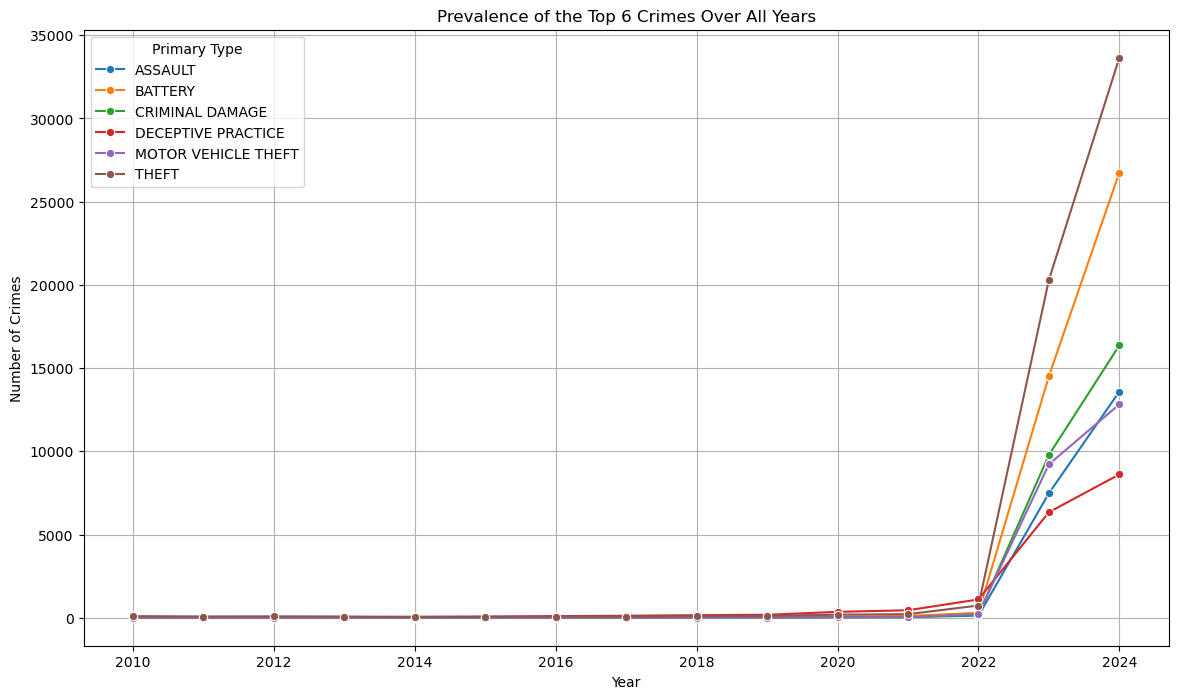

In [16]:
# How has the prevalence of these crimes changed over time?

top_6_crime_df = clean_df[clean_df['Primary Type'].isin(top_6_crimes)]
yearly_crime_counts = top_6_crime_df.groupby(['Year', 'Primary Type']).size().reset_index(name='Crime_Count')

plt.figure(figsize=(14, 8))

# Line plot showing crime counts over time for the top 6 crimes
sns.lineplot(x='Year', y='Crime_Count', hue='Primary Type', data=yearly_crime_counts, marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Prevalence of the Top 6 Crimes Over All Years')

# Show the plot
plt.grid(True) 
plt.show()

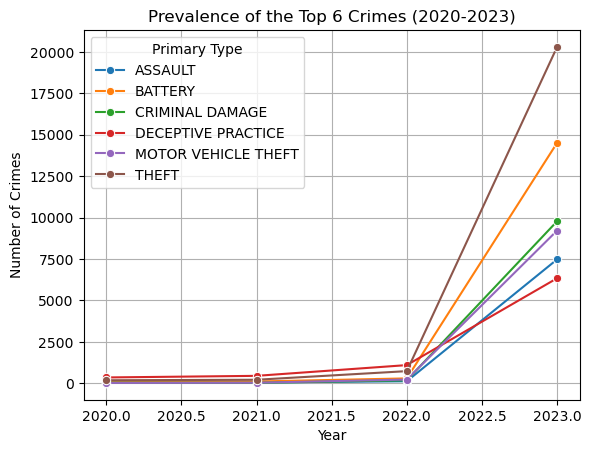

In [18]:
# What trends appeared in these crimes during the initial years of the Covid-19 Pandemic?

# Aggregate crime counts by year and crime type
yearly_crime_counts = top_6_crime_df.groupby(['Year', 'Primary Type']).size().reset_index(name='Crime_Count')

# Filter for the years 2020 to 2023
filtered_yearly_crime_counts = yearly_crime_counts[yearly_crime_counts['Year'].between(2020, 2023)]

# Line plot showing crime counts over time for the top 6 crimes (2020-2023)
sns.lineplot(x='Year', y='Crime_Count', hue='Primary Type', data=filtered_yearly_crime_counts, marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Prevalence of the Top 6 Crimes (2020-2023)')

# Show the plot
plt.grid(True)  # Add a grid for better readability
plt.show()


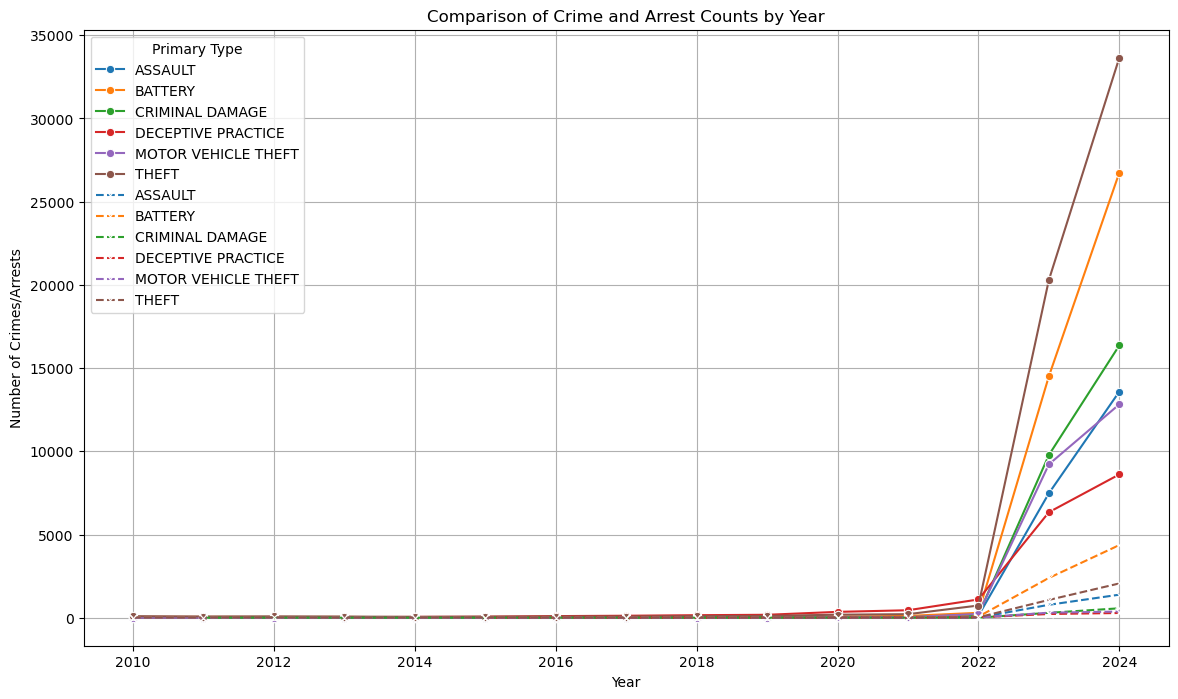

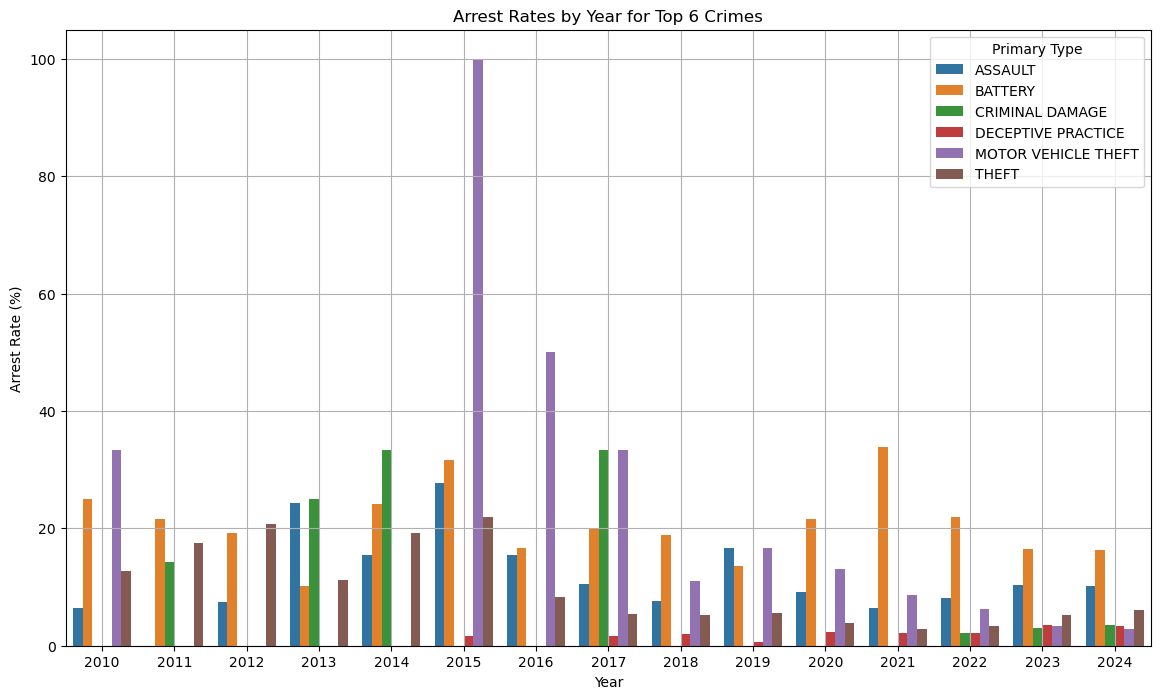

In [25]:
# How do arrest rates compare to crime rates?

yearly_crime_counts = top_6_crime_df.groupby(['Year', 'Primary Type']).size().reset_index(name='Crime_Count')

# Calculate the total number of arrests for each crime type by year
yearly_arrest_counts = top_6_crime_df[top_6_crime_df['Arrest'] == True].groupby(['Year', 'Primary Type']).size().reset_index(name='Arrest_Count')

# Merge the crime counts and arrest counts on Year and Crime_Type
combined_data = pd.merge(yearly_crime_counts, yearly_arrest_counts, on=['Year', 'Primary Type'], how='left')

# Calculate the arrest rate as a percentage
combined_data['Arrest_Rate'] = (combined_data['Arrest_Count'] / combined_data['Crime_Count']) * 100

# Fill NaN values with 0 where there were no arrests recorded
combined_data['Arrest_Rate'] = combined_data['Arrest_Rate'].fillna(0)

plt.figure(figsize=(14, 8))

# Plot crime counts
sns.lineplot(x='Year', y='Crime_Count', hue='Primary Type', data=combined_data, marker='o')

# Plot arrest counts with a different linestyle
sns.lineplot(x='Year', y='Arrest_Count', hue='Primary Type', data=combined_data, marker='x', linestyle='--')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes/Arrests')
plt.title('Comparison of Crime and Arrest Counts by Year')

# Show the plot
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))

# Plot arrest rates
sns.barplot(x='Year', y='Arrest_Rate', hue='Primary Type', data=combined_data)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Arrest Rate (%)')
plt.title('Arrest Rates by Year for Top 6 Crimes')

# Show the plot
plt.grid(True)
plt.show()

In [26]:
# Calculate the mean of arrest rates
mean_arrest_rate = combined_data['Arrest_Rate'].mean()

# Calculate the median of arrest rates
median_arrest_rate = combined_data['Arrest_Rate'].median()

# Calculate the mode of arrest rates
mode_arrest_rate = combined_data['Arrest_Rate'].mode()

# Display the results
print(f"Mean Arrest Rate: {mean_arrest_rate:.2f}%")
print(f"Median Arrest Rate: {median_arrest_rate:.2f}%")
print(f"Mode Arrest Rate: {mode_arrest_rate.values}%")

Mean Arrest Rate: 11.65%
Median Arrest Rate: 7.55%
Mode Arrest Rate: [0.]%
